In [1]:
# test activated or not
def is_acti(acti_lst,cord):
    flag = 0
    for block in acti_lst:
        ac_y_cor = (block-1)//4
        ac_x_cor = (block-1)%4
        x_l = 1/6*(1+ac_x_cor)
        x_h = 1/6*(2+ac_x_cor)
        y_l = 1/6*(1+ac_y_cor)
        y_h = 1/6*(2+ac_y_cor)
        if cord[0] >= x_l and cord[0] <= x_h and cord[1] >= y_l and cord[1] <= y_h:
            flag = 1
    return flag

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# initialize a plot


def plot_error(method,iteration,omega,fig,ax):   
    assert method == 'GS' or method == 'Jacobi'
    # Grid parameters
    N = 25-1  # Size of the grid (N-1 x N-1)
    L = 1.0  # Length of the domain
    dx = L / N  # Grid spacing
    x = np.linspace(0, L, N + 1)  # x-coordinates
    y = np.linspace(0, L, N + 1)  # y-coordinates
    act_lst = [1,7,14,16]

    # calculate A
    A = np.zeros((N + 1, N + 1, N + 1, N + 1))
    for i in range(0, N+1):
        for j in range(0, N+1):
            A[i,j,i,j] = 1
            if i in range(1, N) and j in range(1, N):
                A[i,j,i+1,j] = -0.25
                A[i,j,i-1,j] = -0.25
                A[i,j,i,j+1] = -0.25
                A[i,j,i,j-1] = -0.25

    # set f
    f = np.zeros((N + 1, N + 1))
    for i in range(0,N+1):
        for j in range(0,N+1):
            if is_acti(act_lst,(i*dx,j*dx)):
            #if i<2:
                f[i,j] = 1
                
    # caculate exact
    A_vec = A.reshape(((N+1)**2,(N+1)**2))
    f_vec = f.reshape((N+1)**2)*0.25*dx**2
    u_vec = np.linalg.inv(A_vec).dot(f_vec)
    u_exact = u_vec.reshape((N+1,N+1))

    # Initialize the grid and boundary conditions
    u = np.zeros((N + 1, N + 1))
    u_new = np.copy(u)
    u[0, :] = 0.0  # Boundary condition: u(x, 0) = 0
    u[-1, :] = 0.0  # Boundary condition: u(x, L) = 0
    u[:, 0] = 0.0  # Boundary condition: u(0, y) = 0
    u[:, -1] = 0.0  # Boundary condition: u(L, y) = 0


    # diff
    diff = []

    # Jacobi iteration with relaxation
    for _ in range(iteration):
        for i in range(1, N):
            for j in range(1, N):
                if method == 'Jacobi':
                    u_new[i, j] = (1 - omega) * u[i, j] + (omega / 4) * (
                    u[i + 1, j] + u[i - 1, j] + u[i, j + 1] + u[i, j - 1] + f[i,j]*(dx**2))
                if method == 'GS':
                    u_new[i, j] = (1 - omega) * u[i, j] + (omega / 4) * (
                    u[i + 1, j] + u_new[i - 1, j] + u[i, j + 1] + u_new[i, j - 1] + f[i,j]*(dx**2))
        
        diff.append(np.linalg.norm((u-u_exact).reshape((N+1)**2), ord=2))
        u, u_new = u_new, u
    ax.plot(range(iteration),diff,label='omega = '+str(round(omega,1)))
    
        





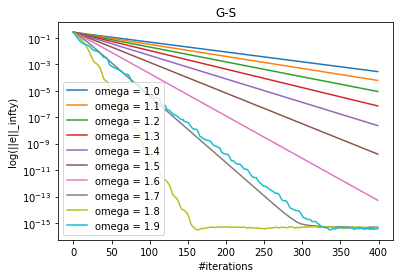

In [13]:
method = 'GS'
iteration = 400

fig, ax = plt.subplots()
for omega in np.linspace(1.0,1.9,10):
    plot_error(method=method,iteration=iteration,omega=omega,fig=fig,ax=ax)

# Plot the solution

ax.set_yscale('log')
ax.set_title("G-S")
ax.set_xlabel("#iterations")
ax.set_ylabel("log(||e||_infty)")
ax.legend()
plt.show()

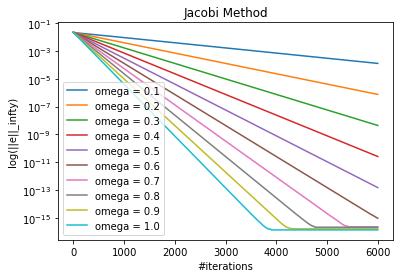

In [10]:
method = 'Jacobi'
iteration = 6000
fig, ax = plt.subplots()
for omega in np.linspace(0.1,1.0,10):
    plot_error(method=method,iteration=iteration,omega=omega,fig=fig,ax=ax)

# Plot the solution

ax.set_yscale('log')
ax.set_title("Jacobi Method")
ax.set_xlabel("#iterations")
ax.set_ylabel("log(||e||_infty)")
ax.legend()
plt.show()